# Create entangled pair

In [1]:
from projectq import MainEngine
from projectq.ops import H, X, Z, Rx, CNOT, Measure
from projectq.meta import Dagger, Control

In [2]:
from projectq.backends import CircuitDrawer
draw_bnd = CircuitDrawer()
eng = MainEngine(draw_bnd)

In [16]:
def my_quantum_state(eng, q):
    H | q
    Rx(1) | q

## State for teleportation

In [17]:
qt = eng.allocate_qubit()

In [18]:
my_quantum_state(eng, qt)

## Create shared entanglement

In [19]:
qa = eng.allocate_qubit()
qb = eng.allocate_qubit()

In [20]:
H | qa

In [21]:
CNOT | (qa, qb)

## Run the protocol

In [22]:
CNOT | (qt, qa)

In [23]:
H | qt
Measure | (qt, qa)
msg = [int(qt), int(qa)]

In [24]:
with Control(eng, qa):
    X | qb
with Control(eng, qt):
    Z | qb

In [25]:
with(Dagger(eng)):
    my_quantum_state(eng,qb)

In [26]:
eng.flush()

In [27]:
del qb

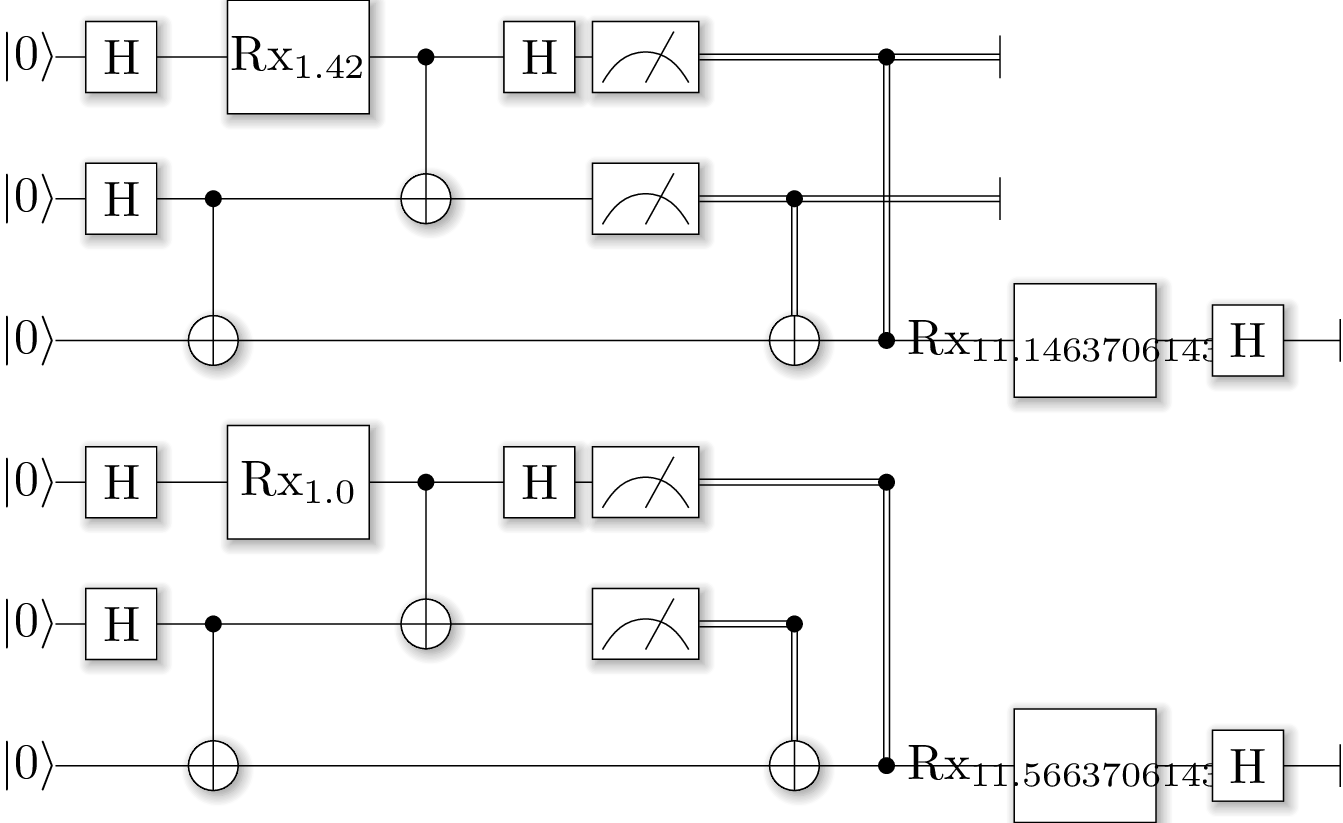

In [28]:
from subprocess import call
from IPython.display import Image

circName = 'teleport_circ'

f = open(circName+'.tex','w')
f.write(draw_bnd.get_latex())
f.close()

call(['pdflatex', circName+'.tex'])
call(['convert', '-density', '450',circName+'.pdf', circName+'.png'])

Image(circName+'.png')